# Project: ANZ synthesised transaction Dataset
## by Imene KOLLI

## Task

> Load the transaction dataset below into an analysis tool of your choice (Excel, R, SAS, Tableau, or similar)

>Start by doing some basic checks – are there any data issues? Does the data need to be cleaned?

>Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?

>Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.

> For a challenge – what insights can you draw from the location information provided in the dataset?

In [3]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('ANZ synthesised transaction dataset.csv')

## Distribution of Transaction Amount

Departure delays in the dataset take on a very large range of values, using an axis limit of [-10 , 350] we can see it's a normal distribution.

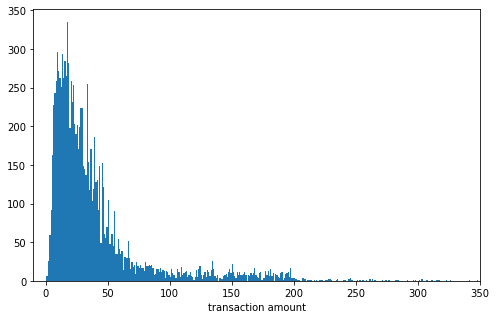

In [5]:
plt.figure(figsize=[8, 5])

bin_edges = np.arange(-10, 350+1,1)
plt.hist(data = df, x = 'amount', bins = bin_edges)
plt.xlim(-10, 350)
plt.xlabel('transaction amount');

## Transaction amount by date

> I decided to add two columns to the dataset: month and day of the transaction to make the segmentation by date easy. I extractted them from the date column.

> These are my conclusion : 
- Wednesday and Friday are the days with the most number of transactions.
- Monday scored the lowest number of transactions
- the difference in the number of transactions between the months is not significants

In [6]:
df['date'] = pd.to_datetime(df['date'])
df['day']= df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()

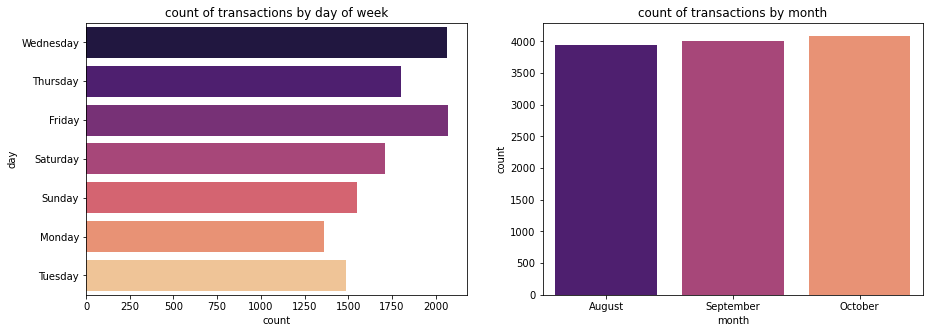

In [7]:
plt.figure(figsize=[15, 5])

# the left plot
plt.subplot(1,2,1)
sns.countplot(y = 'day', data = df, palette = 'magma')
plt.title('count of transactions by day of week')

# the right plot
plt.subplot(1,2,2)
sns.countplot(x = 'month', data = df, palette = 'magma')
plt.title('count of transactions by month');

> Here, I plotted the amount of the transaction by weekday for each month and for each gender is the dataset.

my insight :
- October has higher transaction amounts than Auguest and September.

- outliers in the transaction amount happen in all three months.

- males have higher transaction amounts.

- October is the month with the highest transaction amounts for both genders.

- the amount of transactions is the lowest on weekend Saturday.

- the transactions with the highest amounts happen mostly on Monday.

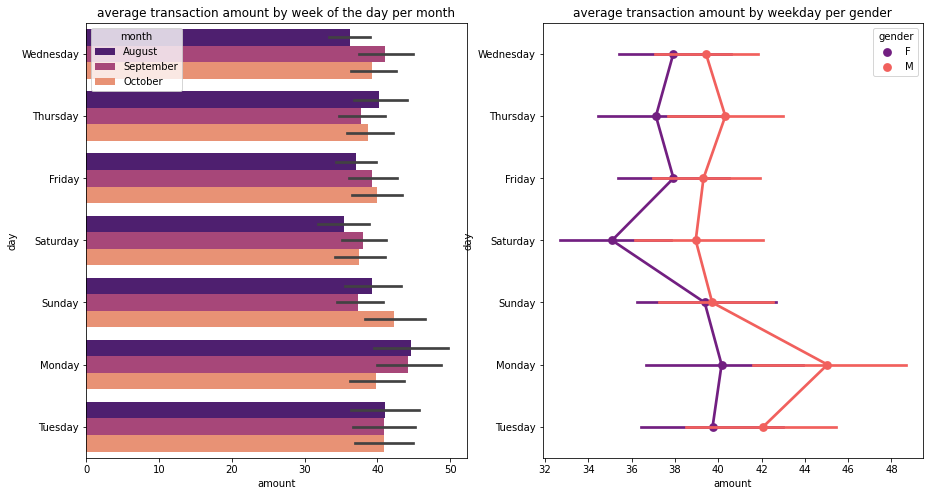

In [46]:
plt.figure(figsize=[15, 8])

plt.subplot(1,2,1)
sns.barplot(y="day", x="amount",hue='month', data=df.query('amount <= 350'), palette = 'magma')
plt.title('average transaction amount by week of the day per month')

plt.subplot(1,2,2)
sns.pointplot(y="day", x="amount", hue="gender", data=df.query('amount <= 350'), palette = 'magma')
plt.title('average transaction amount by weekday per gender');

## Transaction amount by location

> Now, we are going to look at the amount of the transction by merchant_state.

insight :

- NSW and VIC are the states with the most transactions
- NSW and ACT are the states with the highest amounts in transactions.
- women's transaction amounts are higher than men in the state of TAS and ACT

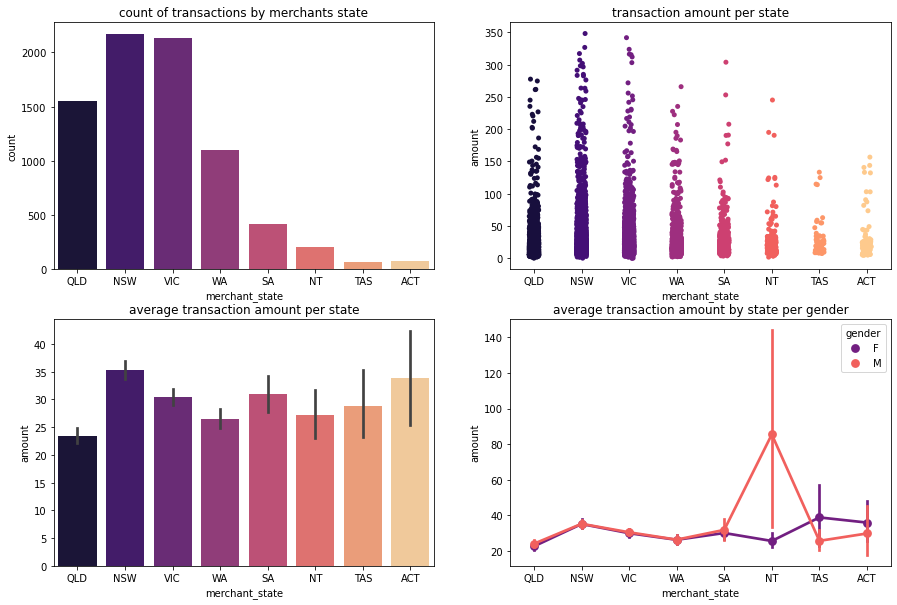

In [52]:
plt.figure(figsize=[15, 10])

plt.subplot(2,2,1)
sns.countplot(x = 'merchant_state', data = df, palette = 'magma')
plt.title('count of transactions by merchants state')

plt.subplot(2,2,2)
sns.stripplot(x="merchant_state", y = 'amount', data=df.query('amount <= 350'), palette = 'magma')
plt.title('transaction amount per state')

plt.subplot(2,2,3)
sns.barplot(x="merchant_state", y="amount", data=df.query('amount <= 350') , palette = 'magma')
plt.title('average transaction amount per state')

plt.subplot(2,2,4)
sns.pointplot(x="merchant_state", y="amount", hue="gender", data=df.query('amount <= 350'), palette = 'magma')
plt.title('average transaction amount by state per gender');

## Amount by transaction type

>in this plot we are looking at the transaction type and its amount.

- small amount transactions are debit and authorised transactions.
- high amount transactions are credit and posted transactions.
- Phone bank transactions are the ones with the highest amount in transactions.

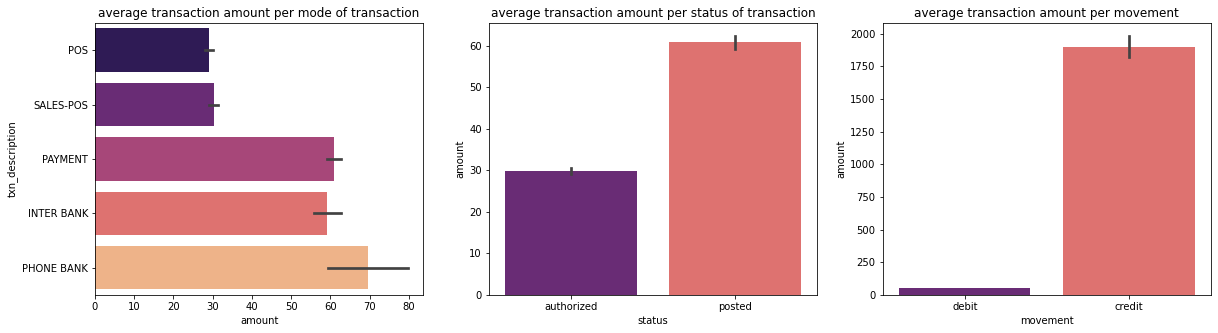

In [39]:
plt.figure(figsize=[20, 5])

plt.subplot(1,3,1)
sns.barplot(y="txn_description", x="amount", data=df.query('amount <= 350') , palette = 'magma')
plt.title('average transaction amount per mode of transaction')


plt.subplot(1,3,2)
sns.barplot(x="status", y="amount", data=df.query('amount <= 350') , palette = 'magma')
plt.title('average transaction amount per status of transaction')

plt.subplot(1,3,3)
sns.barplot(x="movement", y="amount", data=df , palette = 'magma')
plt.title('average transaction amount per movement');

## Amount and Customers

This is where I was looking for the top customers. 

First, I looked for the customers who did the 10 highest amount transactions.

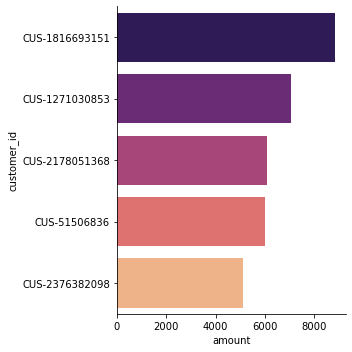

In [26]:
df1 = df.loc[df.amount.sort_values(ascending =False)[:10].index]
sns.catplot(y="customer_id", x="amount", kind="bar", data=df1 , palette = 'magma');

Second, I looked for the 10 customers with the highest record of transactions and their total sum of transaction amount.

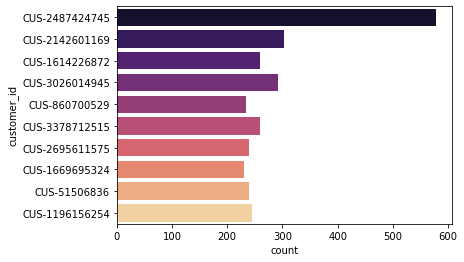

In [31]:
df2 = df.loc[df['customer_id'].isin(df.customer_id.value_counts()[:10].index)]
sns.countplot(y = 'customer_id', data=df2 , palette = 'magma');

Finally, I looked for the customers with 10 highest sum of all their transactions.

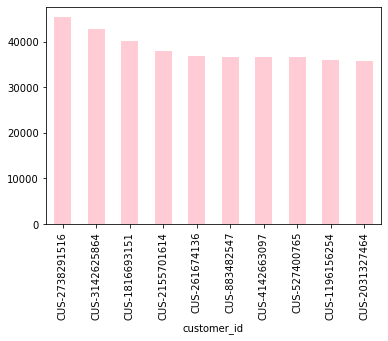

In [32]:
df.groupby('customer_id')['amount'].sum().sort_values(ascending=False)[:10].plot.bar(color = 'pink', alpha = 0.8);

insight :

    
- no customer belongs to top 10 : most spending customers, highest transations made, and highest number of transactions.
- CUS-51506836 is the customer that did the 4th highest transaction amount and ranked 9th in the customers who made the most transactions.
- CUS-1816693151 is the customer that did the highest transaction amount and is the thirst most spending customer.
- CUS-1196156254 is the customer that did more transactions than all others, and is the 9th most spending customer.